<a href="https://colab.research.google.com/github/DennisChangach/Geospatial-Analysis/blob/main/Getting_Started_with_Geographic_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Acknowledgements:**https://towardsdatascience.com/master-geographic-data-science-with-real-world-projects-exercises-96ac1ad14e63

Covering the basics of loading and processing geographic data using Geopandas. It is built on top od Pandas and Numpy libraries. Like the Pandas library, it contains GeodataFrame and GeoSeries.Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among other geometric operations, projections and geographic analysis. You can also visualize and plot maps with Geopandas- It provides a high-level interface to the Matplotlib library- by using the .plot() method on GeodataFrame/GeoSeries.

**The objective of this notebook is to learn:**
1. How to read and write geographic data in Geopandas
2. Project and set Coordinate Reference System(CRS).
3. Visualizing Maps

In [20]:
!pip install geopandas
!pip install plotly_express
!pip install folium

In [21]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly_express as px

In [5]:
!git clone --recursive https://github.com/shakasom/GDS.git

Cloning into 'GDS'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (39/39), done.


In [6]:
# Let us see what we have inside GDS Folder
!ls GDS/dataset/

1-introData.zip


In [9]:
# We have zipped data so let us unzip it
!unzip GDS/dataset/1-introData.zip

Archive:  GDS/dataset/1-introData.zip
   creating: 1-introData/
  inflating: 1-introData/cities.geojson  
  inflating: 1-introData/countries.gpkg  
  inflating: 1-introData/rivers.gpkg  


Geographic (Vector) data comes in different formats (Shapefiles, Geopackage, Geojson …etc). Loading most of Geodata Formats with Geopandas is straightforward. We can use .read_file().

In [10]:
#reading the data
shp = '1-introData/countries.gpkg' #variable for holding file path
countries = gpd.read_file(shp) #reading countries dataset

In [11]:
#reading the first rows
countries.head()

,NAME,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,geometry
0,Indonesia,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,15,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,14,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,14,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.51009..."
4,Peru,31036656,15,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [12]:
#getting the number of rows and columns
countries.shape

(253, 11)

In [13]:
#exploring the statistics of the dataset
countries.describe()

,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR
count,2.530000e+02,253.000000,2.530000e+02,253.000000,253.000000,253.000000
mean,2.927074e+07,11.462451,4.712708e+05,2000.794466,1639.592885,1991.490119
std,1.234639e+08,3.958562,1.936975e+06,178.959064,799.327438,218.598342
min,0.000000e+00,1.000000,0.000000e+00,0.000000,-99.000000,0.000000
25%,1.151200e+05,9.000000,2.851000e+03,2017.000000,2000.000000,2016.000000
50%,4.510327e+06,12.000000,3.299000e+04,2017.000000,2006.000000,2016.000000
75%,1.788524e+07,14.000000,1.890000e+05,2017.000000,2010.000000,2016.000000
max,1.379303e+09,18.000000,2.114000e+07,2017.000000,2012.000000,2016.000000


In [14]:
#reading the cities dataset- geojson file
cities = gpd.read_file('1-introData/cities.geojson')

In [15]:
cities.head()

,name,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other,geometry
0,Colonia del Sacramento,0.0,0,-34.479999,-57.840002,21714,21714,0,POINT (-57.84000 -34.48000)
1,Trinidad,0.0,0,-33.543999,-56.900997,21093,21093,0,POINT (-56.90100 -33.54400)
2,Fray Bentos,0.0,0,-33.138999,-58.303997,23279,23279,0,POINT (-58.30400 -33.13900)
3,Canelones,0.0,0,-34.538004,-56.284001,19698,19698,0,POINT (-56.28400 -34.53800)
4,Florida,0.0,0,-34.099002,-56.214998,32234,32234,0,POINT (-56.21500 -34.09900)


In [16]:
cities.shape

(7343, 9)

In [17]:
cities.describe()

,worldcity,megacity,latitude,longitude,pop_max,pop_min,pop_other
count,7343.000000,7343.000000,7343.000000,7343.000000,7.343000e+03,7.343000e+03,7.343000e+03
mean,0.009533,0.080349,20.496166,10.987582,3.218734e+05,2.078131e+05,4.137240e+05
std,0.097177,0.271851,29.263073,79.435193,1.066623e+06,6.414873e+05,1.258383e+06
min,0.000000,0.000000,-89.982894,-179.589979,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,0.000000,0.000000,-0.674573,-64.781974,1.947850e+04,1.337000e+04,0.000000e+00
50%,0.000000,0.000000,26.640298,18.699985,6.945100e+04,5.003200e+04,3.981700e+04
75%,0.000000,0.000000,43.532008,73.292415,2.297540e+05,1.634720e+05,2.230085e+05
max,1.000000,1.000000,82.483323,179.383304,3.567600e+07,1.460851e+07,2.145995e+07


Plotting maps in Geopandas is easy and available through .plot() function. Since we have two datasets countries and cities data, we can overlay them and display it as a map. Here we set up the subplots using Matplotlib and pass the axis to Geopandas .plot() function.

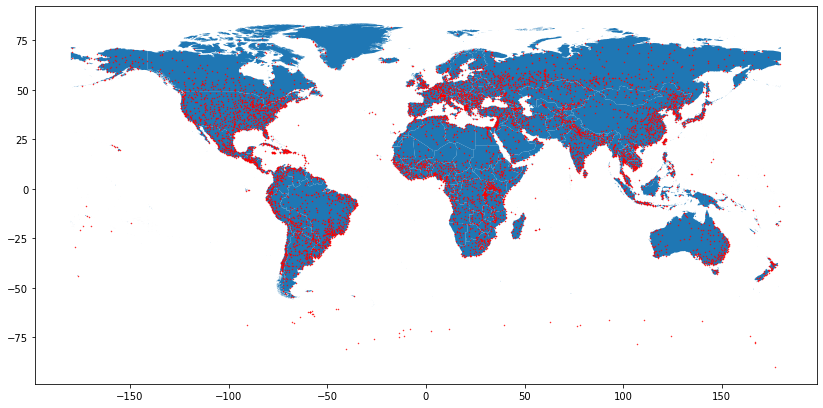

In [23]:
#plot overlayed maps
fig, ax = plt.subplots(figsize = (14,12))
countries.plot(ax=ax)
cities.plot(markersize=0.2,color='red',ax=ax)
plt.show()

In [24]:
#reading the rivers dataset
rivers = gpd.read_file('1-introData/rivers.gpkg')
rivers.head()

,dissolve,scalerank,featurecla,name,name_alt,rivernum,note,min_zoom,name_en,min_label,label,wikidataid,name_ar,name_bn,name_de,name_es,name_fr,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,0River,1.0,River,Irrawaddy Delta,None,0,None,2.0,Irrawaddy,3.0,Irrawaddy Delta,Q26076,نهر إيراوادي,None,Irrawaddy,Irawadi,Irrawaddy,None,इरावती नदी,Iravádi,Sungai Irrawaddy,Irrawaddy,エーヤワディー川,이라와디 강,Irrawaddy,Irawadi,Rio Irauádi,Иравади,Irrawaddy,İravadi Nehri,Sông Ayeyarwaddy,伊洛瓦底江,2,1159109417,"MULTILINESTRING ((95.45110 17.82050, 95.42766 ..."
1,1001Lake Centerline,9.0,Lake Centerline,Tonle Sap,None,1001,None,7.1,None,8.1,Tonle Sap,Q939958,None,None,Tonle Sap,None,None,None,None,None,None,None,None,None,Tonlé Sap,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109429,"MULTILINESTRING ((103.68743 13.22468, 103.7133..."
2,1001River,9.0,River,Tonle Sap,None,1001,None,7.1,None,8.1,Tonle Sap,Q939958,None,None,Tonle Sap,None,None,None,None,None,None,None,None,None,Tonlé Sap,Tonle Sap,None,Тонлесап,None,None,None,None,4,1159109445,"MULTILINESTRING ((104.61476 12.38203, 104.6176..."
3,1002Lake Centerline,9.0,Lake Centerline,Sheksna,None,1002,None,7.1,Sheksna,8.1,Sheksna,Q1147118,None,None,Scheksna,Río Sheksná,Cheksna,None,None,None,None,Šeksna,シェクスナ川,None,Sjeksna,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109447,"MULTILINESTRING ((37.73951 59.07954, 37.75733 ..."
4,1002River,9.0,River,Sheksna,None,1002,None,7.1,Sheksna,8.1,Sheksna,Q1147118,None,None,Scheksna,Río Sheksná,Cheksna,None,None,None,None,Šeksna,シェクスナ川,None,Sjeksna,Szeksna,None,Шексна,Sjeksna,None,None,舍克斯納河,4,1159109461,"MULTILINESTRING ((38.47804 59.21666, 38.48528 ..."


In [26]:
rivers.shape

(1455, 35)

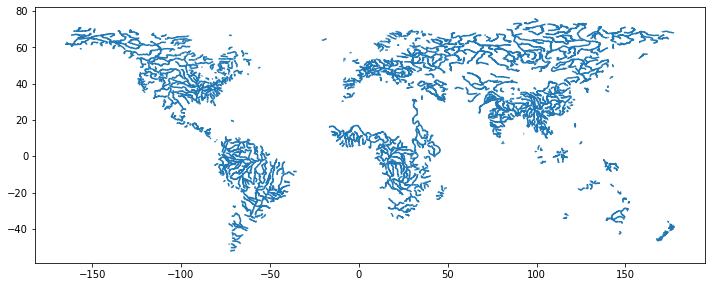

In [28]:
#plotting the rivers dataset
fig, ax = plt.subplots(figsize = (12,10))
rivers.plot(ax=ax)
plt.show()

### Coordinate System and Projections

Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geodataframes has .crs attribute that can give you the original CRS used in the data. 

In [29]:
#gepdataframes crs attribute
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

This is the output of the above code {‘init’: ‘epsg:4326’}.EPSG stands for European Petroleum Survey Group and is an authority that maintains spatial reference systems. The code 4326 indicates which Geographic Coordinate System is used, in this case (WGS84) The World Geodetic System of 1984.

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is a common to process and reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections:

In [30]:
#looking at the geometry column
countries.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    MULTIPOLYGON (((-69.51009 -17.50659, -69.51009...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

This is the output of the above code. It just prints out the latitude and longitude of the Polygons. These coordinates are in decimal degrees now.

Let us project this data and see the changes. In this example, we project to EPSG:3395 which is the widely used Mercator projection.


In [31]:
#projecting the data into Mercator Projection epsg=3395
countries_projected = countries.to_crs({'init':'epsg:3395'})

#checking the projected values
countries_projected['geometry'][:5]

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

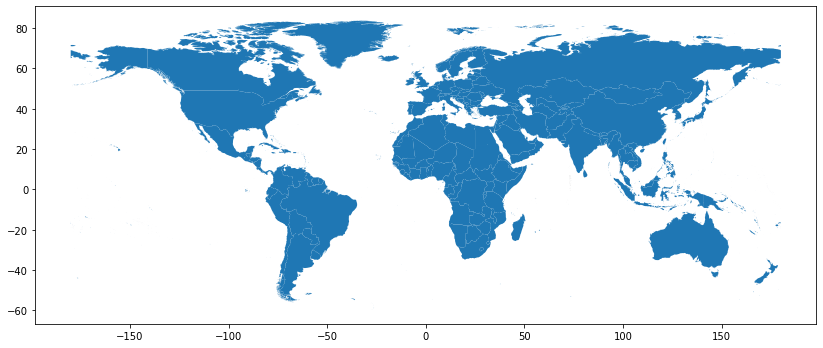

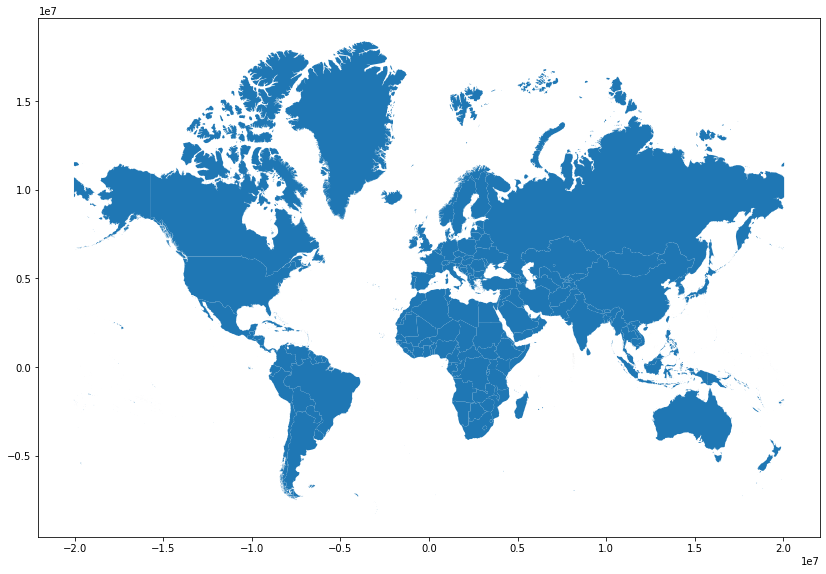

In [34]:
#plotting the new projected map
countries.plot(figsize=(14,12));
countries_projected.plot(figsize=(14,12))

Due to the projection, the geometry is no longer measured in decimal style points but in a metre unit. It is easier to understand the difference in maps. Let us plot both the original countries and the projected countries.

Notice the different scales of x and y in both maps. The Mercator projection distorts the size of the objects as we go further from the equator to the poles. That is why Africa looks small and Greenland appears much larger than its size.

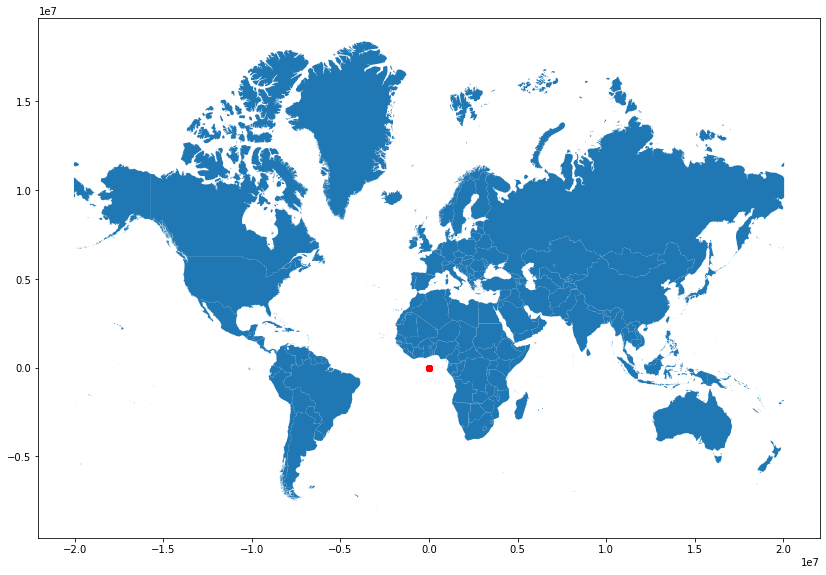

In [35]:
fig, ax = plt.subplots(figsize=(14,12))
countries_projected.plot(ax=ax)
# Cities are still in WGS84
cities.plot(ax=ax, color='red'); 

If you try to overlay the projected data with unprojected data, then your data will not align properly. As seen from above, the cities are not overlayed properly in the projected countries dataset. They all fall near Africa and that is not their proper positions.

In [37]:
#converting the cities dataset to projected epsg:3395
#projecting the data into Mercator Projection epsg=3395
cities_projected = cities.to_crs({'init':'epsg:3395'})

#checking the projected values
cities_projected['geometry'][:5]

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



0    POINT (-6438719.623 -4069248.462)
1    POINT (-6334189.963 -3944125.489)
2    POINT (-6490371.310 -3890411.118)
3    POINT (-6265506.386 -4077048.683)
4    POINT (-6257825.002 -4018149.162)
Name: geometry, dtype: geometry

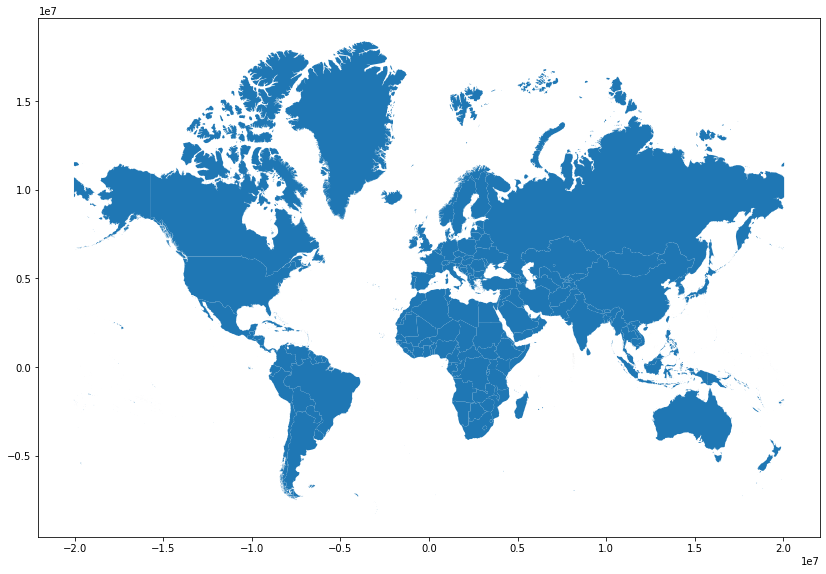

In [43]:
#plot overlayed projected maps
fig, ax = plt.subplots(figsize = (14,12))
countries_projected.plot(ax=ax)
#cities_projected.plot(color = 'red',ax=ax)
plt.show()

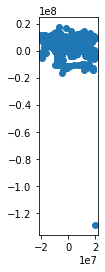

In [44]:
cities_projected.plot()

## **Writing Geographic Data**

We can easily save any new data created to our local disk. This is helpful when you want to access that file in another time without carrying out the same operations again. Let us save our projected countries. Remember we have projected it. Geopandas has .to_file() method.

In [45]:
# Save projected countries 
shp = '1-introData/countries_epsg3395.shp'
countries_projected.to_file(shp)
